In [67]:
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
# Read in data
data = pd.read_csv('master.csv')

# Number of rows and columns
print(data.shape)

# Display first 5 rows
data.head()

(27820, 12)


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [69]:
# Dataframe info 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [70]:
# Convert gdp_for_year to dtype int
data['gdp_for_year ($)'] = data[' gdp_for_year ($) '].str.replace(',','').astype(int)
data.drop(' gdp_for_year ($) ', axis=1, inplace=True)

# Descriptive stats of numerical columns
data.describe().round(2)

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($),gdp_for_year ($)
count,27820.00,27820.00,27820.00,27820.00,8364.00,27820.00,2.782000e+04
mean,2001.26,242.57,1844793.62,12.82,0.78,16866.46,4.455810e+11
std,8.47,902.05,3911779.44,18.96,0.09,18887.58,1.453610e+12
min,1985.00,0.00,278.00,0.00,0.48,251.00,4.691962e+07
25%,1995.00,3.00,97498.50,0.92,0.71,3447.00,8.985353e+09
50%,2002.00,25.00,430150.00,5.99,0.78,9372.00,4.811469e+10
75%,2008.00,131.00,1486143.25,16.62,0.86,24874.00,2.602024e+11
max,2016.00,22338.00,43805214.00,224.97,0.94,126352.00,1.812071e+13


In [71]:
# Number of unique values in categorical columns
categoricals = data.select_dtypes(['object'])
display(categoricals.nunique())

country          101
sex                2
age                6
country-year    2321
generation         6
dtype: int64

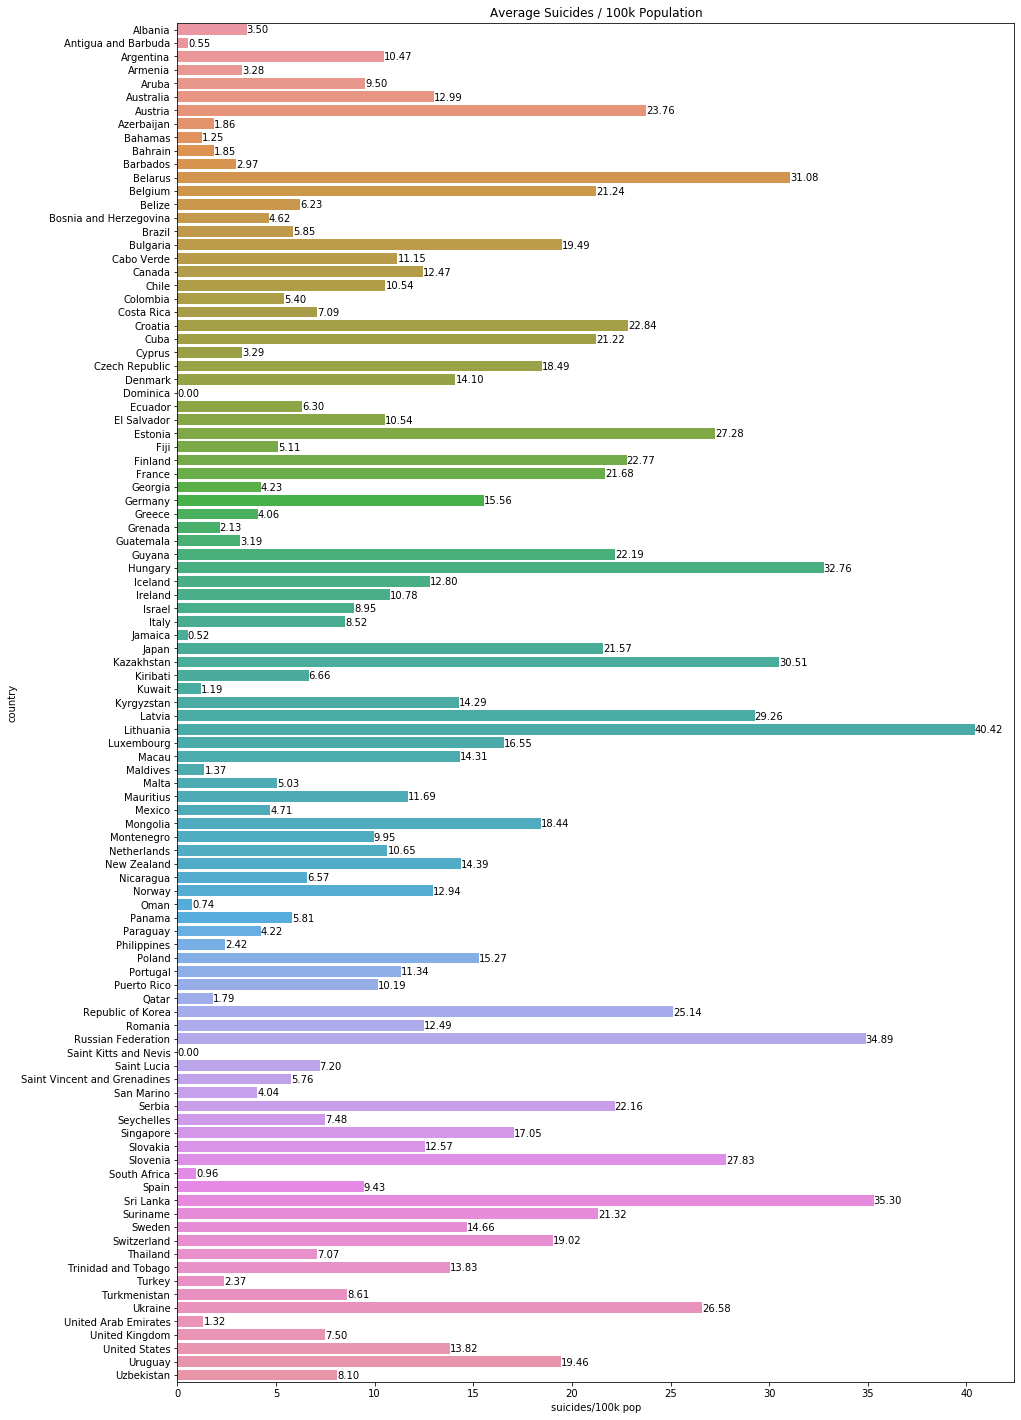

In [72]:
# Average Country Population Plot
plt.figure(figsize=(15,25))
plt.title('Average Suicides / 100k Population')
ax = sns.barplot(x='suicides/100k pop',y='country',data=data,ci=None)

# Annotate counties           
for p in ax.patches:
    width = p.get_width()
    plt.text(p.get_width(), p.get_y()+.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='left', va='center')
plt.show()

In [73]:
data_by_country_mean = data.groupby('country').mean()
mean_suicides = data_by_country_mean[['suicides/100k pop']]
mean_suicides.sort_values('suicides/100k pop',ascending=False)[:10]

,suicides/100k pop
country,
Lithuania,40.415573
Sri Lanka,35.295152
Russian Federation,34.892377
Hungary,32.761516
Belarus,31.075913
Kazakhstan,30.511282
Latvia,29.259325
Slovenia,27.827857
Estonia,27.276905


In [74]:
mean_suicides.sort_values('suicides/100k pop')[:10]

,suicides/100k pop
country,
Saint Kitts and Nevis,0.000000
Dominica,0.000000
Jamaica,0.521765
Antigua and Barbuda,0.552901
Oman,0.736111
South Africa,0.964542
Kuwait,1.186433
Bahamas,1.247391
United Arab Emirates,1.317917


In [75]:
# Group data by year
data_by_year = data.groupby('year').sum()

# Display first and last 5 rows
display(data_by_year.head())
display(data_by_year.tail())

,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($),gdp_for_year ($)
year,,,,,,
1985,116063,1008600086,6811.89,310.428,3508548,110964754234500
1986,120670,1029909613,6579.84,0.000,4104636,132609631982868
1987,126842,1095029726,7545.45,0.000,5645760,155769882274200
1988,121026,1054094424,7473.13,0.000,5870508,175557691204476
1989,160244,1225514347,8036.54,0.000,6068424,191618261647176


,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($),gdp_for_year ($)
year,,,,,,
2012,230160,1912812088,11101.91,753.036,26058300,676502580180480
2013,223199,1890161710,10663.64,746.880,26911368,685050211812900
2014,222984,1912057309,10306.73,727.668,25665252,672496725417372
2015,203640,1774657932,8253.99,0.000,19516008,580433884300596
2016,15603,132101896,2147.39,0.000,4106420,29252100111210


In [76]:
# Remove 2016
data_by_year = data_by_year[:-1]

# Rescale columns betwwen 0 - 1 to visualize on one plot
def rescale(values):
    max_val = max(values)
    min_val = min(values)
    scaled_values = []
    for val in values:
        try:
            new_val = (val - min_val) / (max_val - min_val)
            scaled_values.append(new_val)
        # Handle null values
        except:
            scaled_values.append(np.nan)
    return scaled_values
# Apply rescaling function to all columns
rescaled = data_by_year.apply(rescale)

# Display first and last 5 rows
display(rescaled.round(2).head())
display(rescaled.tail())

,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($),gdp_for_year ($)
year,,,,,,
1985,0.00,0.00,0.03,0.39,0.00,0.00
1986,0.03,0.02,0.00,0.00,0.03,0.04
1987,0.08,0.09,0.12,0.00,0.09,0.08
1988,0.04,0.05,0.11,0.00,0.10,0.11
1989,0.32,0.22,0.18,0.00,0.11,0.14


,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($),gdp_for_year ($)
year,,,,,,
2011,0.859806,0.996020,0.592543,0.966604,0.999997,0.987719
2012,0.814653,0.914549,0.559633,0.941036,0.962527,0.985111
2013,0.764951,0.891640,0.505395,0.933343,0.998940,1.000000
2014,0.763416,0.913786,0.461225,0.909335,0.945750,0.978133
2015,0.625300,0.774815,0.207186,0.000000,0.683272,0.817769


ValueError: x and y must have same first dimension, but have shapes (31,) and (1,)

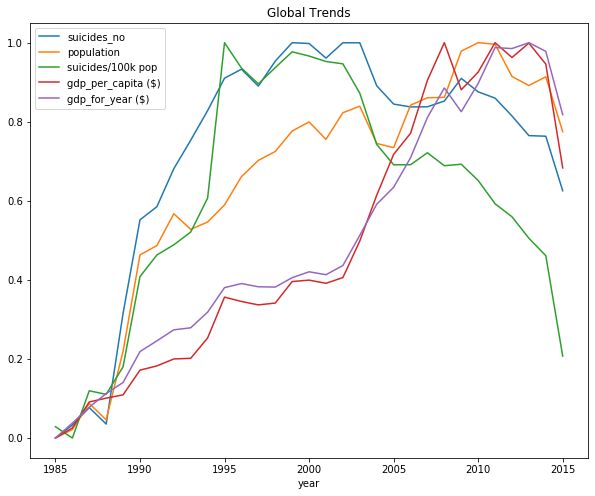

In [77]:
# Plot Global Time Series Data
# Scatter plot HDI for year due to incontinuous data

rescaled = rescaled.drop(['HDI for year'], axis = 1)

rescaled.plot(figsize=(10,8))
plt.title('Global Trends')
plt.plot(rescaled.index, range(0,1))
plt.show()

# Show correlation heatmap
sns.heatmap(rescaled.corr(),annot=True)
plt.show()